# Exploratory data analysis
This file contains the code and output for the exploratory data analysis.

Task 1A of assignment 1

Group 34: Fenna Berger (???), Manya Walavalkar (???) & Lara Olders (2691204)

In [6]:
data_file = "./data/dataset_mood_smartphone.csv"

Column 0 = item number

Column 1 = participant ID

Column 2 = date + time

Column 3 = variable

Column 4 = value

### Number of records
1. How many records are there?
2. How many items per variable are there?

In [8]:
variables = dict()
app_variables = dict()
variable_values = dict()
app_variable_values = dict()

with open(data_file, "r") as file:
    data = file.read()
    rows = data.strip().split("\n")
    
    for row in rows[1:]:
        if row:
            items = row.split(",")
            variable = items[3]

            try:
                value = float(items[4])
            except ValueError:
                continue
                
            clean_variable = variable.split(".")[-1].replace('"', "")

            if variable.startswith('"app'):
                if clean_variable not in app_variables:
                    app_variables[clean_variable] = 1
                    app_variable_values[clean_variable] = [value]
                else:
                    app_variables[clean_variable] += 1
                    app_variable_values[clean_variable].append(value)
            else:
                if clean_variable not in variables:
                    variables[clean_variable] = 1
                    variable_values[clean_variable] = [value]
                else:
                    variables[clean_variable] += 1
                    variable_values[clean_variable].append(value)


print(f"The total number of records is {sum(variables.values())+sum(app_variables.values())}")
print(f"The number of records per variable is {variables}")
print(f"The total number of records for app variables is {sum(app_variables.values())}")
print(f"The number of records per app variable is {app_variables}")


The total number of records is 376710
The number of records per variable is {'mood': 5641, 'arousal': 5597, 'valence': 5487, 'activity': 22965, 'screen': 96578, 'call': 5239, 'sms': 1798}
The total number of records for app variables is 233405
The number of records per app variable is {'builtin': 91288, 'communication': 74276, 'entertainment': 27125, 'finance': 939, 'game': 813, 'office': 5642, 'other': 7650, 'social': 19145, 'travel': 2846, 'unknown': 939, 'utilities': 2487, 'weather': 255}


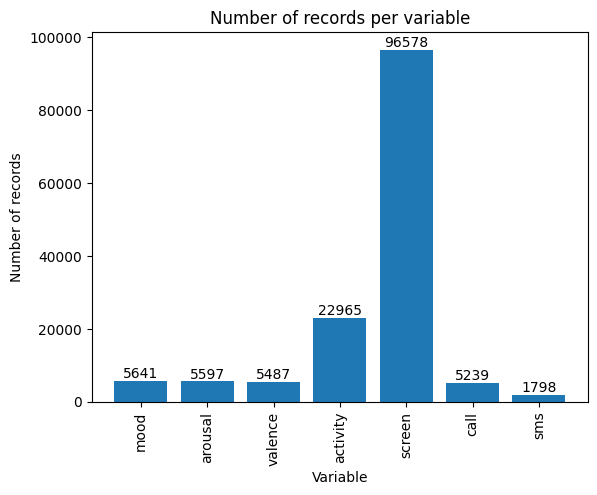

In [ ]:
import matplotlib.pyplot as plt

labels = list(variables.keys())
values = list(variables.values())

bars = plt.bar(labels, values)
plt.title('Number of records per variable')
plt.xlabel('Variable')
plt.ylabel('Number of records')
plt.xticks(rotation=90)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(height),
             ha='center', va='bottom')
plt.show()


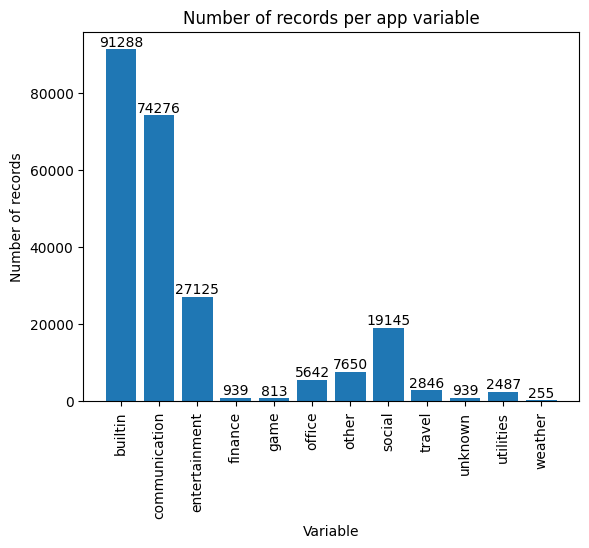

In [20]:
labels = list(app_variables.keys())
values = list(app_variables.values())

bars = plt.bar(labels, values)
plt.title('Number of records per app variable')
plt.xlabel('Variable')
plt.ylabel('Number of records')
plt.xticks(rotation=90)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(height),
             ha='center', va='bottom')
plt.show()

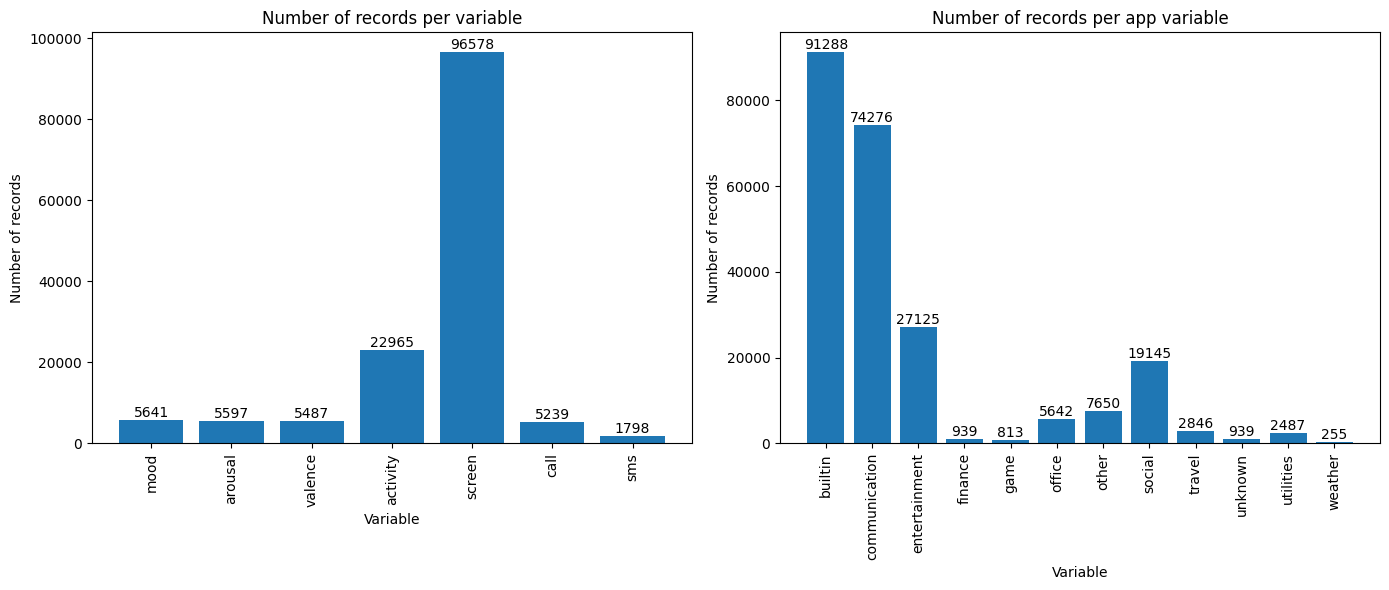

In [9]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# First bar chart
labels = list(variables.keys())
values = list(variables.values())
bars1 = axs[0].bar(labels, values)
axs[0].set_title('Number of records per variable')
axs[0].set_xlabel('Variable')
axs[0].set_ylabel('Number of records')
axs[0].tick_params(axis='x', rotation=90)
for bar in bars1:
    height = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, height + 0.5, str(height),
                ha='center', va='bottom')

# Second bar chart
labels = list(app_variables.keys())
values = list(app_variables.values())
bars2 = axs[1].bar(labels, values)
axs[1].set_title('Number of records per app variable')
axs[1].set_xlabel('Variable')
axs[1].set_ylabel('Number of records')
axs[1].tick_params(axis='x', rotation=90)
for bar in bars2:
    height = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, height + 0.5, str(height),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


3. Ranges of values per variable
4. Distribution of value per variable

In [21]:
for key, values in variable_values.items():
    print(f"The range of {key} is {min(values)} - {max(values)}")
    
print("\n")

for key, values in app_variable_values.items():
    print(f"The range of app use in category {key} is {min(values)} - {max(values)}")

The range of mood is 1.0 - 10.0
The range of arousal is -2.0 - 2.0
The range of valence is -2.0 - 2.0
The range of activity is 0.0 - 1.0
The range of screen is 0.0350000858306885 - 9867.00699996948
The range of call is 1.0 - 1.0
The range of sms is 1.0 - 1.0


The range of app use in category builtin is -82798.871 - 33960.246
The range of app use in category communication is 0.006 - 9830.777
The range of app use in category entertainment is -0.011 - 32148.677
The range of app use in category finance is 0.131 - 355.513
The range of app use in category game is 1.003 - 5491.793
The range of app use in category office is 0.003 - 32708.818
The range of app use in category other is 0.014 - 3892.038
The range of app use in category social is 0.094 - 30000.906
The range of app use in category travel is 0.08 - 10452.615
The range of app use in category unknown is 0.111 - 2239.937
The range of app use in category utilities is 0.246 - 1802.649
The range of app use in category weather is 1.003 - 3

Mood is scored out of 10

Arousal and valence are score from -2 to +2

Activity is scored between 0 and 1

Screen is scored in seconds

Call and SMS are scored 1 when the participants makes a call or sends (/receives??) an SMS

The app times are scored in seconds, there seems to be faulty values for the builtin and entertainment category as their minimum values are negative

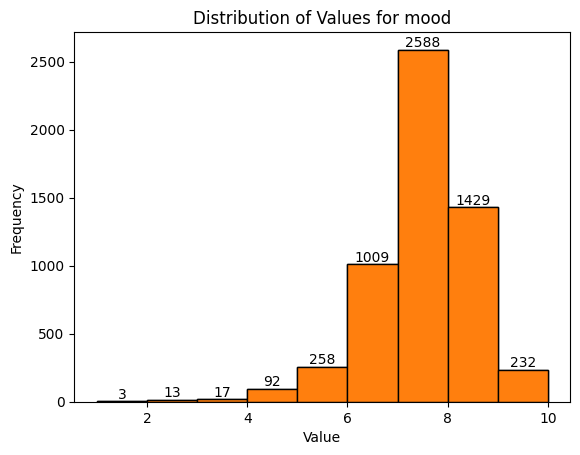

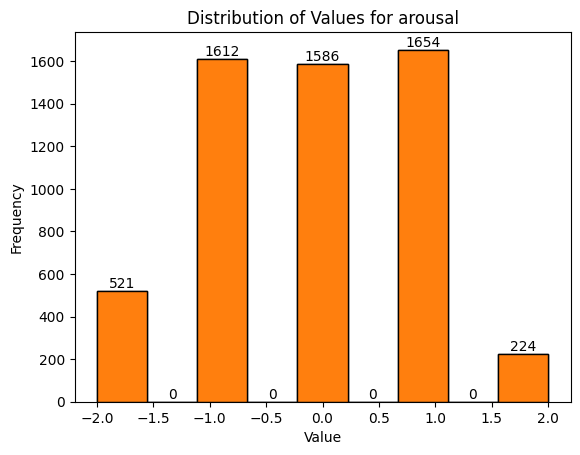

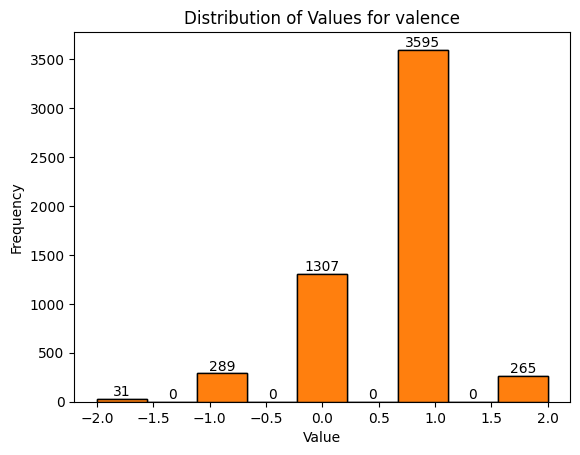

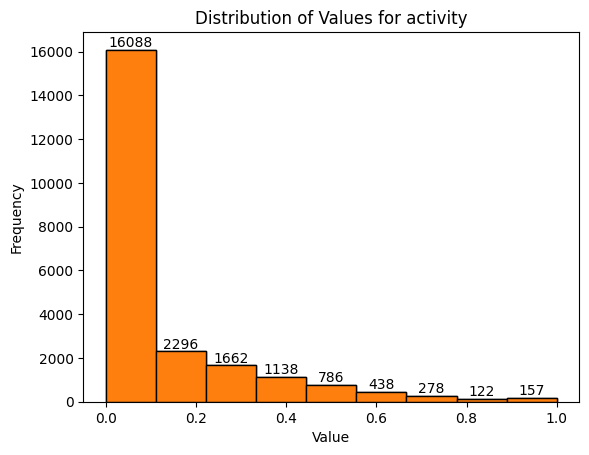

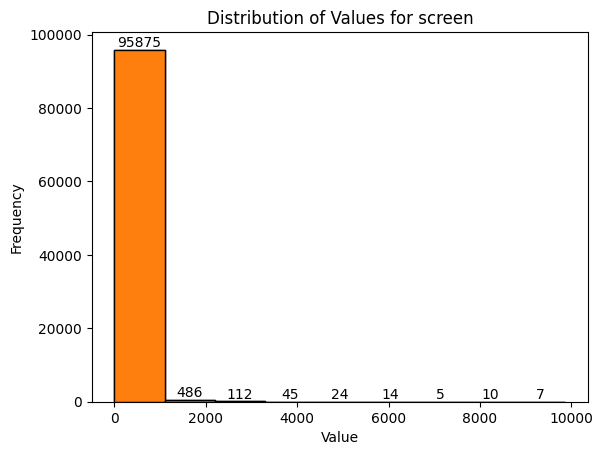

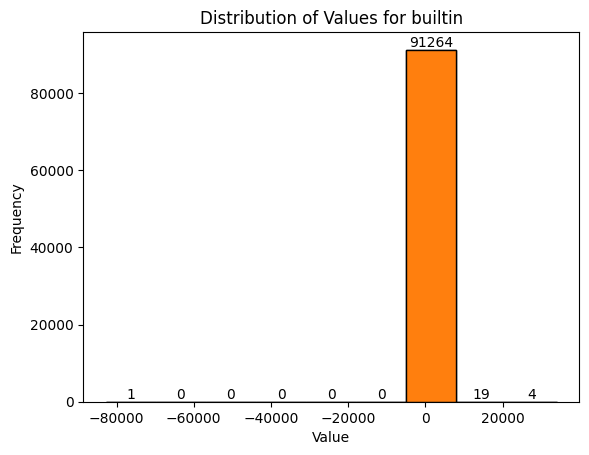

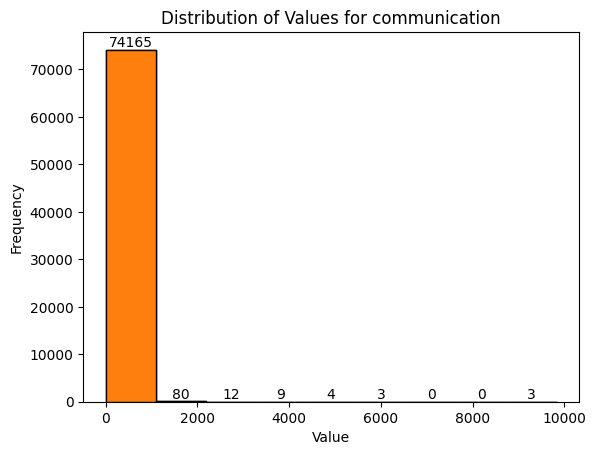

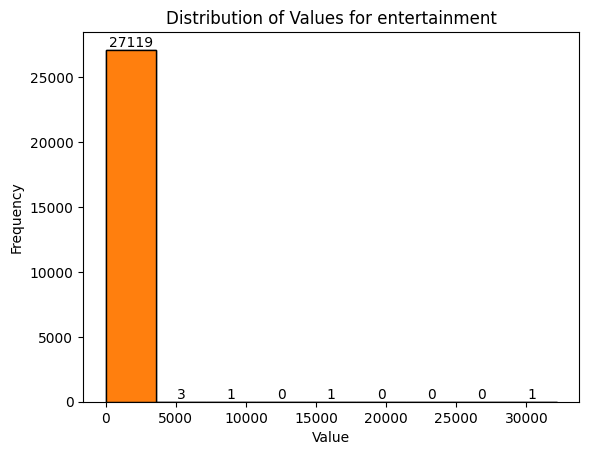

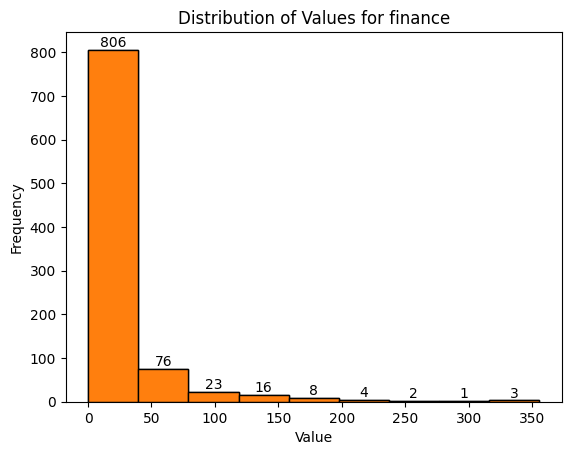

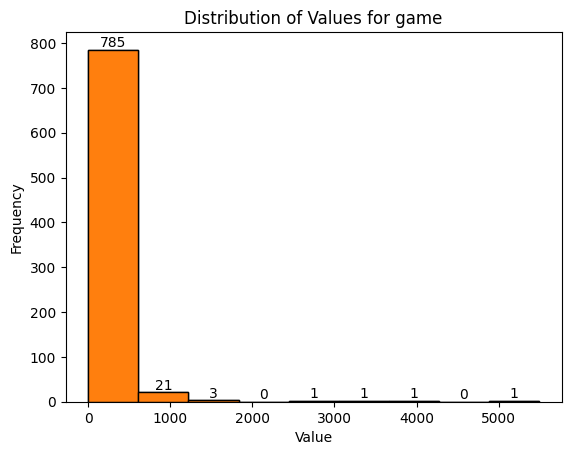

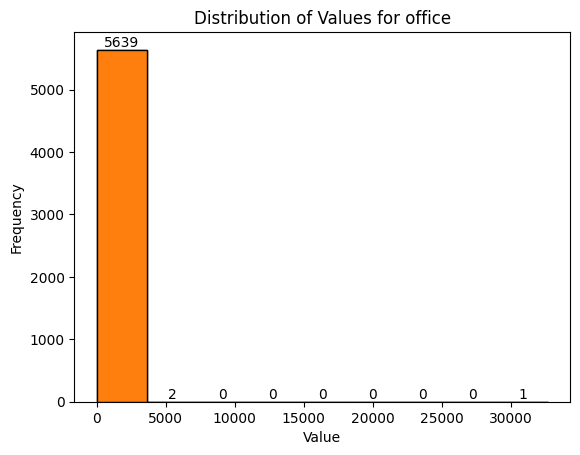

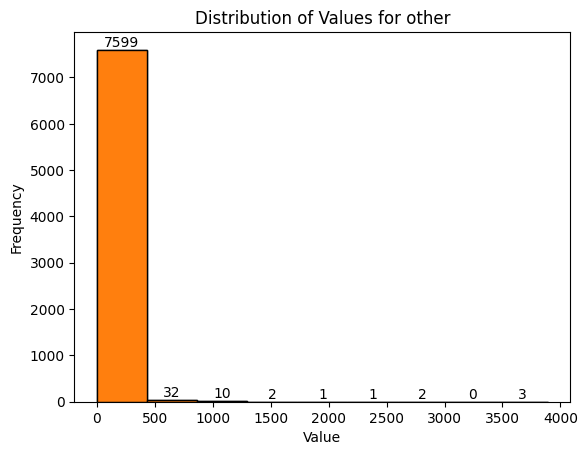

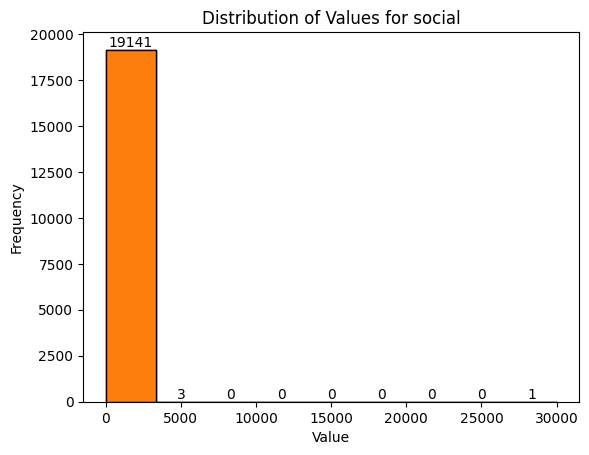

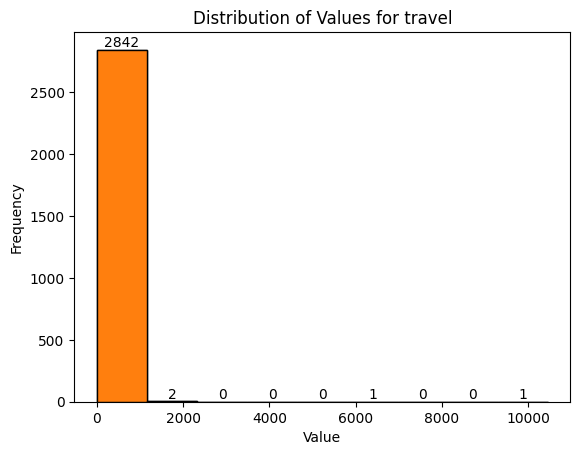

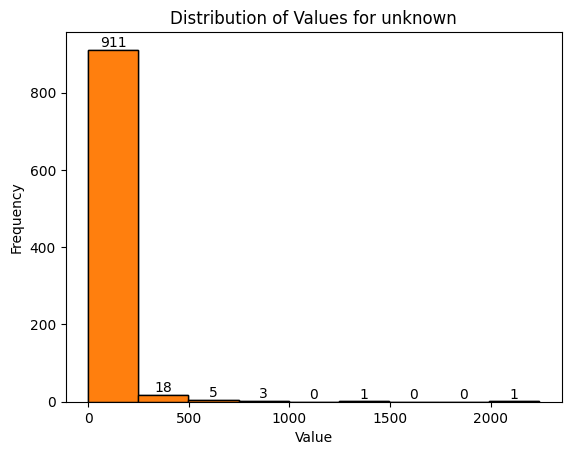

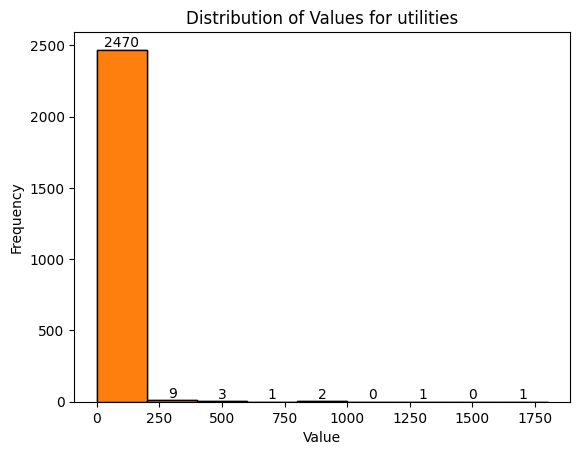

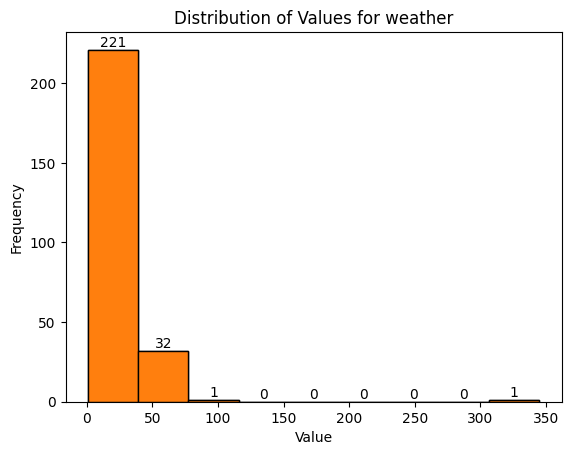

In [22]:
import numpy as np
import seaborn as sns

for key, values in variable_values.items():
    if key == "call":
        continue
    elif key == "sms":
        continue
    else:
        bins = np.linspace(min(values), max(values), 10)
        counts, bin_edges, patches = plt.hist(values, bins=bins, edgecolor='black')
        for count, bin_edge in zip(counts, bin_edges[:-1]):
            plt.text(bin_edge + (bin_edges[1] - bin_edges[0]) / 2, count, str(int(count)), 
                    ha='center', va='bottom', fontsize=10, color='black')
        plt.hist(values, bins=bins, edgecolor='black')
        plt.title('Distribution of Values for ' + key)
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()

for key, values in app_variable_values.items():
    bins = np.linspace(min(values), max(values), 10)
    counts, bin_edges, patches = plt.hist(values, bins=bins, edgecolor='black')
    for count, bin_edge in zip(counts, bin_edges[:-1]):
        plt.text(bin_edge + (bin_edges[1] - bin_edges[0]) / 2, count, str(int(count)), 
                ha='center', va='bottom', fontsize=10, color='black')
    plt.hist(values, bins=bins, edgecolor='black')
    plt.title('Distribution of Values for ' + key)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()


We should have a look at the distribution of the app times and how we want to deal with them.

# Exploratory data analysis of the modified dataset

0: day  
1: day_id  
2: id  
3: mood  
4: activity  
5: circumplex.valence  
6: circumplex.arousal  
7: appCat.other  
8: appCat.finance  
9: appCat.social  
10: appCat.travel  
11: appCat.game  
12: appCat.builtin  
13: appCat.communication  
14: call  
15: appCat.unknown  
16: appCat.office  
17: appCat.weather  
18: sms  
19: appCat.entertainment  
20: screen  
21: appCat.utilities  
22: target  

In [ ]:
cleaned_data = "./data/features_classification.csv"

categories = {}
app_categories = {}
days = []

with open(cleaned_data, "r") as infile:
    data = infile.read()
    rows = data.split("\n")
    print(f"The number of days recorded in the cleaned data is: {len(rows) - 1}")
    for category in rows[0].split(","):
        if category in ["day", "day_id", "id"]:
            continue
        elif category.startswith('app'):
            app_categories[category] = []
        else:
            categories[category] = []
    for row in rows[1:]:
        items = row.split(",")
        if len(items) < 23:
            continue
        else:
            for i, category in enumerate(rows[0].split(",")):
                if category in ["day_id", "id"]:
                    continue
                if category == "day":
                    days.append(items[i])
                elif category.startswith('app'):
                    try:
                        app_categories[category].append(float(items[i]))
                    except ValueError:
                        app_categories[category].append(float(-100))
                        continue
                else:
                    try:
                        categories[category].append(float(items[i]))
                    except ValueError:
                        categories[category].append(float(-100))
                        continue

The number of days recorded in the cleaned data is: 1217


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("./data/features_classification.csv")

# Drop unwanted columns
drop_cols = ['Unnamed: 0', 'day', 'day_id', 'id']
df = df.drop(columns=drop_cols)

# Optional: Normalize feature columns (helps training)
from sklearn.preprocessing import MinMaxScaler

features = df.drop(columns=['target'])
target = df['target']

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Rebuild DataFrame
X = pd.DataFrame(scaled_features, columns=features.columns)
y = target.values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

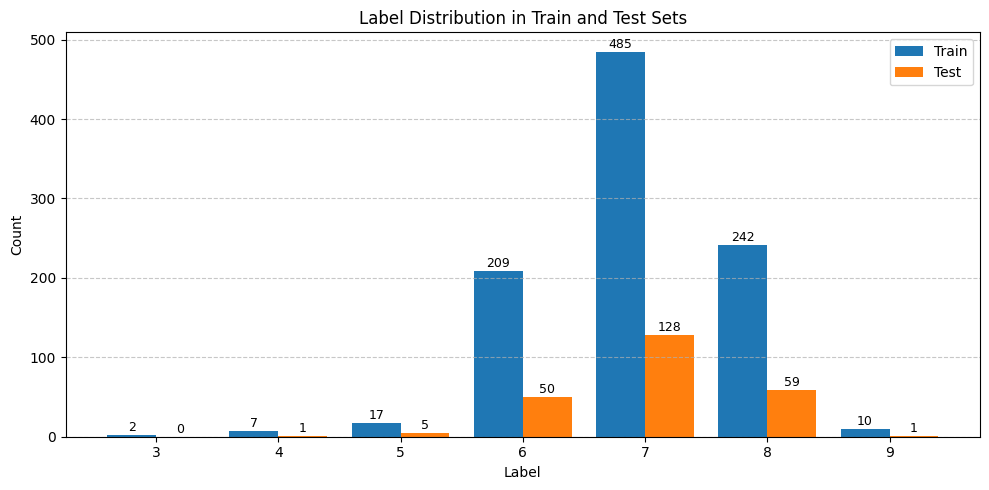

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Count label frequencies
train_counts = pd.Series(y_train).value_counts().sort_index()
test_counts = pd.Series(y_test).value_counts().sort_index()

# Convert to common index (in case some labels are missing in test)
all_labels = sorted(set(y_train) | set(y_test))
train_counts = train_counts.reindex(all_labels, fill_value=0)
test_counts = test_counts.reindex(all_labels, fill_value=0)

x = np.arange(len(all_labels))  # label positions

plt.figure(figsize=(10, 5))
bars1 = plt.bar(x - 0.2, train_counts, width=0.4, label='Train')
bars2 = plt.bar(x + 0.2, test_counts, width=0.4, label='Test')

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, int(yval), ha='center', va='bottom', fontsize=9)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, int(yval), ha='center', va='bottom', fontsize=9)

# Customize
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution in Train and Test Sets')
plt.xticks(ticks=x, labels=all_labels)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [47]:
for key, values in categories.items():
    values = [value for value in values if value != -100]
    print(f"The range of {key} is {min(values)} - {max(values)}")
    
print("\n")

for key, values in app_categories.items():
    values = [value for value in values if value != -100]
    print(f"The range of app use in category {key} is {min(values)} - {max(values)}")

The range of day is 2014-02-26 - 2014-06-07
The range of mood is 3.0 - 9.333333333333334
The range of activity is 0.0 - 0.5494297847746124
The range of circumplex.valence is -1.25 - 2.0
The range of circumplex.arousal is -2.0 - 2.0
The range of call is 0.0 - 31.0
The range of sms is 0.0 - 15.0
The range of screen is 0.0 - 36204.10500144956
The range of target is 3.0 - 9.333333333333334


The range of app use in category appCat.other is 0.0 - 1424.031478310208
The range of app use in category appCat.finance is 0.0 - 543.5432857489047
The range of app use in category appCat.social is 0.0 - 12452.362911288452
The range of app use in category appCat.travel is 0.0 - 1636.648545719229
The range of app use in category appCat.game is 0.0 - 3430.952398128177
The range of app use in category appCat.builtin is 0.0 - 3531.816125044548
The range of app use in category appCat.communication is 0.0 - 10511.695206128632
The range of app use in category appCat.unknown is 0.0 - 1489.9524370336942
The ran

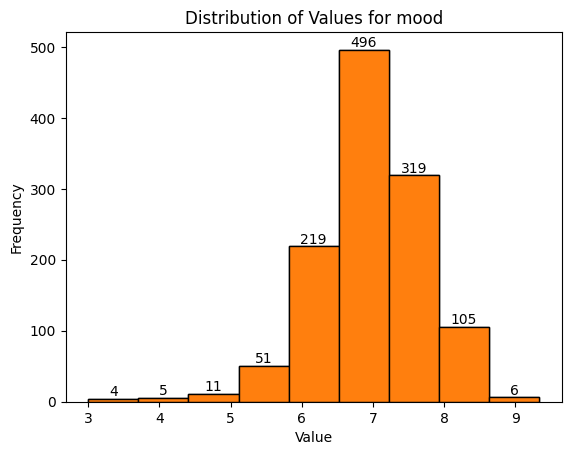

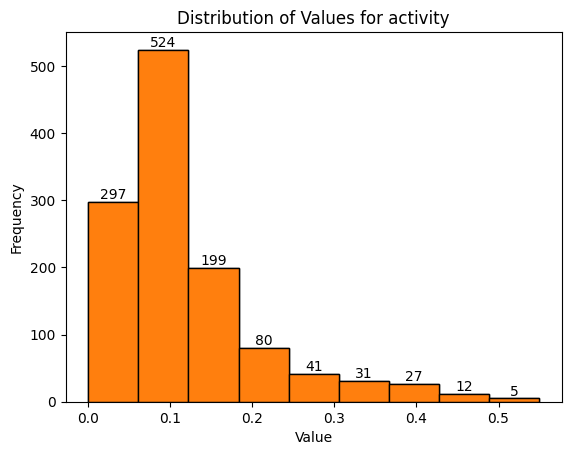

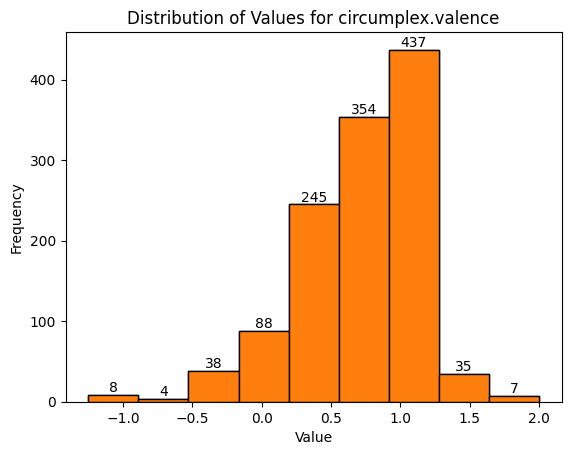

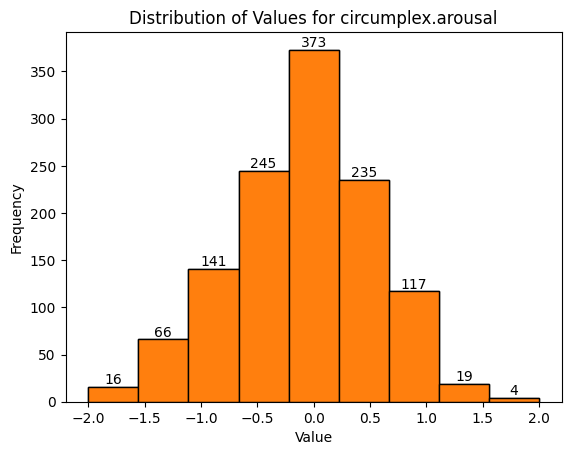

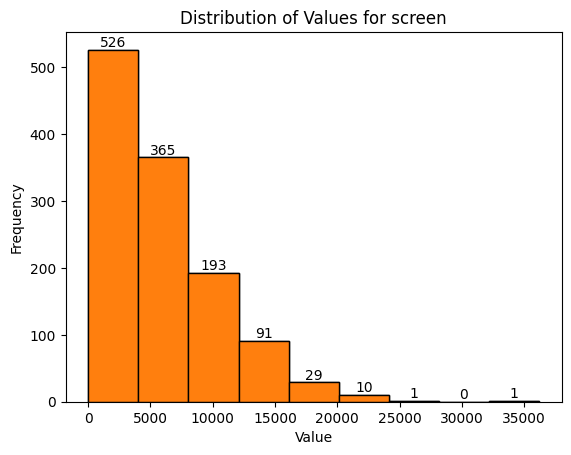

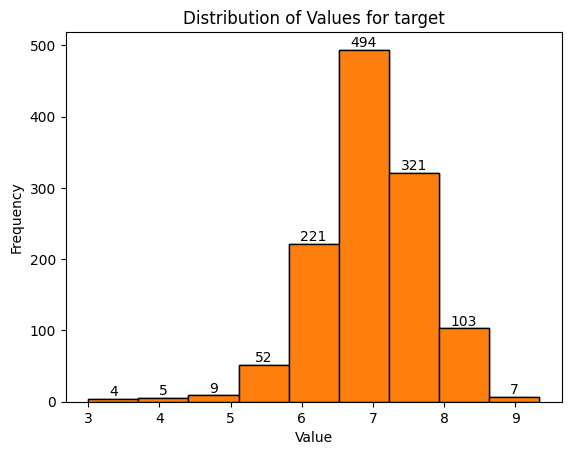

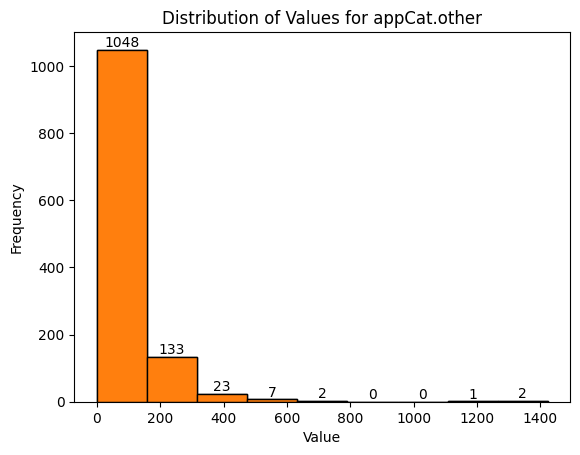

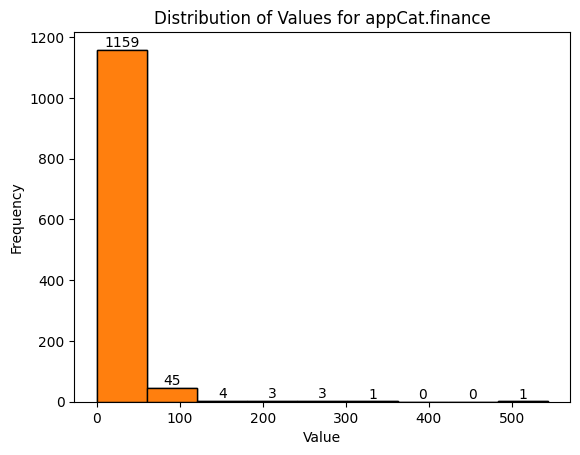

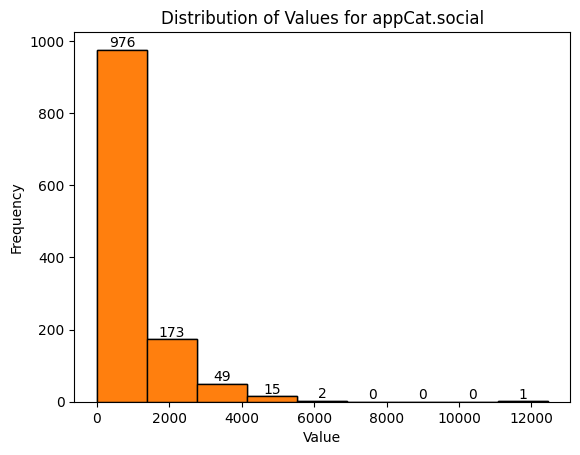

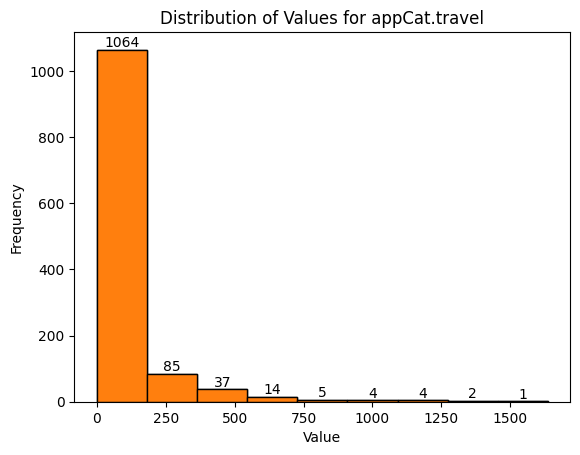

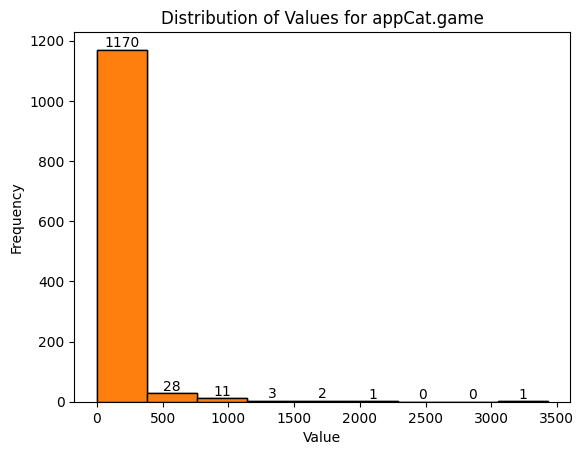

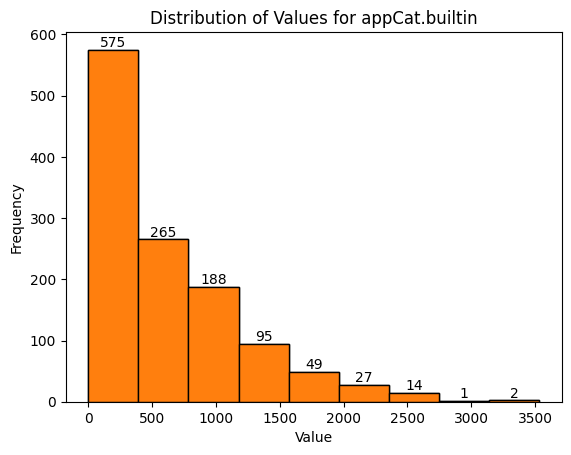

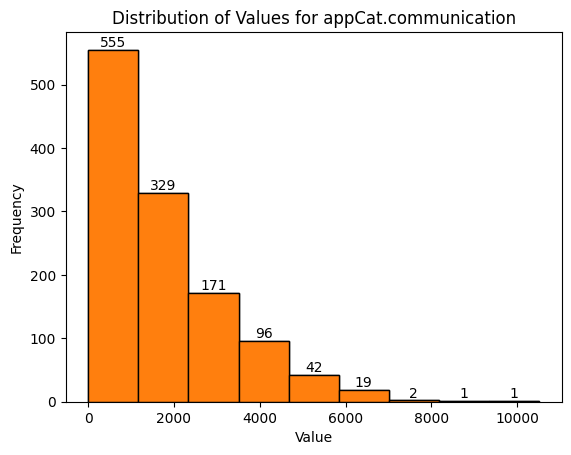

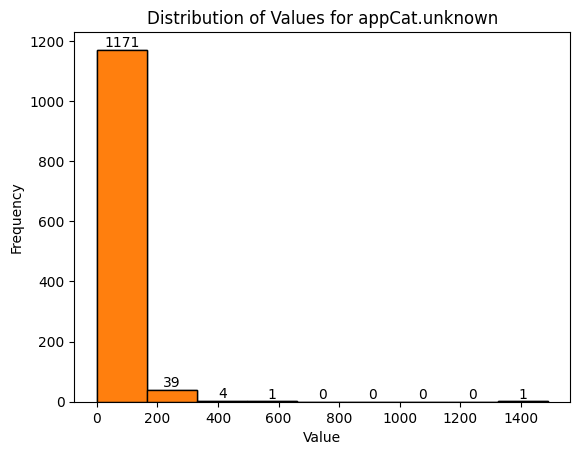

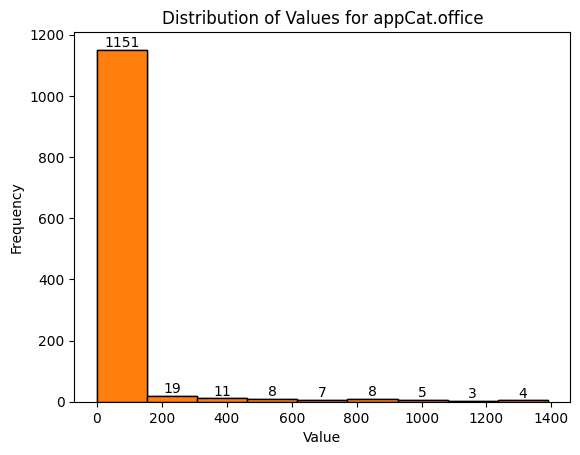

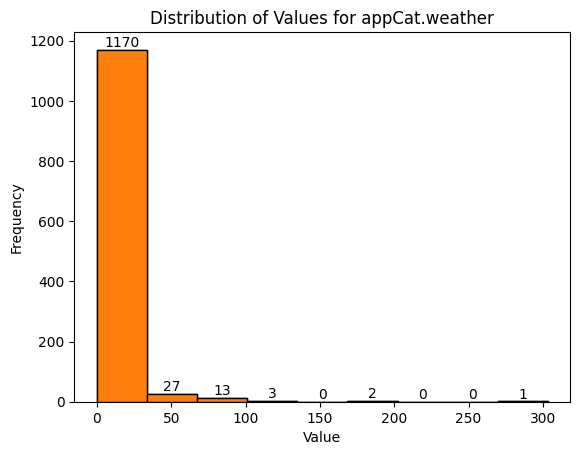

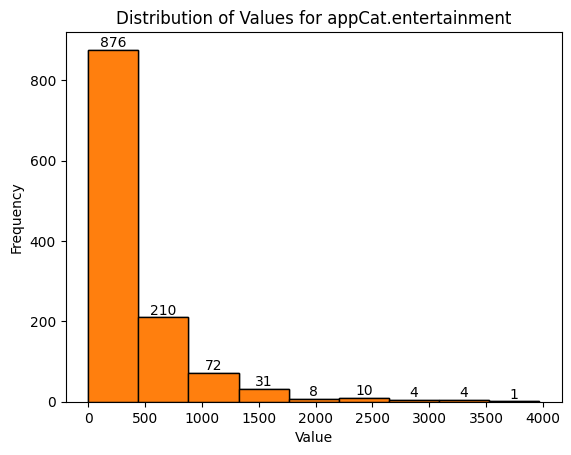

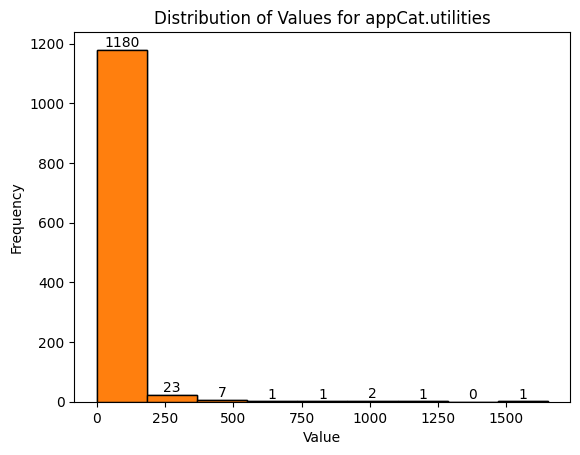

In [53]:
import numpy as np
import seaborn as sns

for key, values in categories.items():
    values = [value for value in values if value != -100]
    if key == "call":
        continue
    elif key == "sms":
        continue
    else:
        bins = np.linspace(min(values), max(values), 10)
        counts, bin_edges, patches = plt.hist(values, bins=bins, edgecolor='black')
        for count, bin_edge in zip(counts, bin_edges[:-1]):
            plt.text(bin_edge + (bin_edges[1] - bin_edges[0]) / 2, count, str(int(count)), 
                    ha='center', va='bottom', fontsize=10, color='black')
        plt.hist(values, bins=bins, edgecolor='black')
        plt.title('Distribution of Values for ' + key)
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()

for key, values in app_categories.items():
    values = [value for value in values if value != -100]
    bins = np.linspace(min(values), max(values), 10)
    counts, bin_edges, patches = plt.hist(values, bins=bins, edgecolor='black')
    for count, bin_edge in zip(counts, bin_edges[:-1]):
        plt.text(bin_edge + (bin_edges[1] - bin_edges[0]) / 2, count, str(int(count)), 
                ha='center', va='bottom', fontsize=10, color='black')
    plt.hist(values, bins=bins, edgecolor='black')
    plt.title('Distribution of Values for ' + key)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

with open("./data/correlations.txt", "w") as outfile:

    for key, values in categories.items():
        if key in ["target", "mood"]:
            continue
        target_values = categories["target"]

        plt.scatter(values, target_values)
        plt.title(f'Scatter Plot of target and {key}')
        plt.xlabel(f'{key} values')
        plt.ylabel('target values')
        plt.savefig(f"./scatterplots/scatterplot_{key}_vs_target.png", dpi=300, bbox_inches='tight')
        plt.clf()

        corr, p_value = pearsonr(categories['target'], categories[key])

        outfile.write(f"Pearson correlation for {key}: {corr:.3f}\n")
        outfile.write(f"P-value: {p_value:.4f}\n")
        if p_value < 0.05:
            outfile.write("Significant\n\n")
        else:
            outfile.write("Not significant\n\n")

    for key, values in app_categories.items():
        target_values = categories["target"]

        plt.scatter(values, target_values)
        plt.title(f'Scatter Plot of target and {key}')
        plt.xlabel(f'{key} values')
        plt.ylabel('target values')
        plt.savefig(f"./scatterplots/scatterplot_{key}_vs_target.png", dpi=300, bbox_inches='tight')
        plt.clf()

        corr, p_value = pearsonr(categories['target'], app_categories[key])
        
        outfile.write(f"Pearson correlation for {key}: {corr:.3f}\n")
        outfile.write(f"P-value: {p_value:.4f}\n")
        if p_value < 0.05:
            outfile.write("Significant\n\n")
        else:
            outfile.write("Not significant\n\n")


<Figure size 640x480 with 0 Axes>

In [68]:
targets = []

for key,values in categories.items():
    if key == "target":
        for value in values:
            targets.append(value)

print(len(targets))
print(len(days))

1216
1216


In [ ]:
df = pd.DataFrame({'day': days, 'target': targets})

grouped = df.groupby('day')['target'].apply(list)
grouped = grouped.sort_index()

plt.figure(figsize=(12, 4))  # Adjust size as needed
plt.boxplot(grouped.values, labels=grouped.index, patch_artist=True)# #### jrjnfdd###hflwenf;owenf;ojewbnfl;jwebf;kj jdkjdjdjdjdkdkwopowoend s

plt.title('Boxplot of Target Values per Day')
plt.xlabel('Date')
plt.ylabel('Target Value')
plt.xticks(rotation=90, fontsize=4)

plt.tight_layout()
plt.savefig("./scatterplots/boxplot_date_vs_target.png", dpi=300, bbox_inches='tight')
plt.clf()


/var/folders/7m/sfpt57612dz6twx1fsmfxnfr0000gn/T/ipykernel_28159/2123229047.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(grouped.values, labels=grouped.index, patch_artist=True)


<Figure size 1200x400 with 0 Axes>

In [78]:
df = pd.DataFrame({'day': days, 'mood': targets})

grouped = df.groupby('day')['mood'].mean()

grouped = grouped.sort_index()

plt.figure(figsize=(10, 4))
plt.bar(grouped.index, grouped.values)
plt.title('Average Mood per Day')
plt.xlabel('Date')
plt.ylabel('Average Mood')
plt.xticks(rotation=90, fontsize=4)

for i, value in enumerate(grouped.values):
    plt.text(i, value + 0.05, f'{value:.2f}', ha='center', va='bottom', fontsize=3)

plt.tight_layout()
plt.savefig("./scatterplots/barplot_date_vs_mood.png", dpi=300, bbox_inches='tight')
plt.clf()


<Figure size 1000x400 with 0 Axes>

In [ ]:
date_series = pd.Series(pd.to_datetime(days))

weekdays = date_series.dt.day_name()
weekdays = weekdays.tolist()

print(weekdays)
print(len(weekdays))

['Wednesday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday

In [71]:
plt.scatter(weekdays, targets, s=10)
plt.title(f'Scatter Plot of date and targets')
plt.xlabel('date values')
plt.ylabel('target values')
plt.xticks(rotation=90, fontsize=4)
plt.savefig(f"./scatterplots/scatterplot_date_vs_target.png", dpi=300, bbox_inches='tight')
plt.clf()

<Figure size 640x480 with 0 Axes>

In [73]:
df = pd.DataFrame({'weekday': weekdays, 'target': targets})
grouped = df.groupby('weekday')['target'].mean()

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped = grouped.reindex(ordered_days)

plt.bar(grouped.index, grouped.values)
plt.title('Average Target Value by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Target')
plt.xticks(rotation=45)

for i, value in enumerate(grouped.values):
    plt.text(i, value + 0.05, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig("./scatterplots/barplot_weekday_vs_target.png", dpi=300, bbox_inches='tight')
plt.clf()


<Figure size 640x480 with 0 Axes>